In [1]:
from scipy import stats
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import Image

# STATISTICAL INFERENCE 1: Regression

the process of deducing properties of an underlying distribution

# Least squares 

**TODO**: generate data from function y(x)=(x-5)^2 + 10, adding Gaussian noise 

In [21]:
stats.norm.rvs?

In [22]:
# Define the function
true_func = lambda x: (x - 5.0)**2 + 10.0
# Size of the sample
N = 20
# Set seed and generate N uniform values
np.random.seed(45)
x = np.random.uniform(0, 20, size=N)
# Compute true_func(x) and add normal(mu=0, sigma=20) noise
data = true_func(x)
data += stats.norm.rvs(0, 20, size=20)

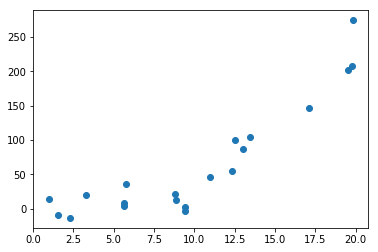

In [23]:
plt.scatter(x,data)
plt.show()

If underlying PDF of data $y$ is i.i.d. as Gaussian, likelihood is: 
$$
{\cal L}(\bf w) = \prod_{i=1}^N  {\cal N}(y_i|\bar{y}_i,\sigma_y)
$$

where 
$$  \bar y_i = \bar y_i({\bf w}) $$

and ${\bf w}$ are the parameters of the machine-learning model.

For a given model, choose the parameters that **maximise** the likelihood (MLE). For Gaussian, equivalent to minimise:
$$
{\rm Cost} = \frac{1}{N}\sum_{i=1}^N \big( y_i - \bar{y}_i({\bf w})\big)^2~~~~~ (\rm MSE)
$$

**TODO**: define Cost function

In [24]:
def Cost(y_obs, y_pred):
    return np.mean((y_obs - y_pred)**2)

**Machine Learning procedure:**  choose the model for $\bar y(x)$ that best fit **new data**

Assume a basis of functions like 
$$ f(x) = \beta_0 + \sum_{p=1}^P \beta_p x^p = \beta^T\cdot \vec\phi(x),  $$
where $\vec\phi(x) = (1, x, x^2, ..., x^P)$.

then the result of minimisation can be computed analytically, and is:
$$
\beta_{\rm ML} = (\Phi^T\Phi)^{-1}\Phi^T\cdot {\bf y}~~~~~~~~~~(1)
$$
, where $\Phi$ is a matrix of shape $N\times P \Rightarrow$
```
1 | x_1 | x_1**2 | ... | x_1**P
1 | x_2 | x_2**2 | ... | x_2**P
...
1 | x_N | x_N**2 | ... | x_N**P
```

In [26]:
def Phi(x,P):
    # x: input vector
    # P: order of polynomial
    xt=x.reshape((-1,1))
    Phi=np.ones(len(x)).reshape((-1,1))
    for p in range(1,P+1):
        Phi=np.hstack((Phi,xt**p))
    return Phi


**TODO**: define Beta function

In [27]:
def beta_MSE(Phi, y):
    return np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T.dot(y))

In [30]:
beta_MSE(Phi(x, 3), data)

array([ 1.28478179e+01, -6.61859379e+00,  8.68369613e-01,  1.17140767e-03])

Idea is to have optimal prediction in data never seen before:
Dataset _randomly_ partitioned into **training** and **test** sets 

**TODO**: reshuffle and partition data in training and test

In [32]:
np.random.seed(124)
perm = np.random.permutation(N)
perm

array([12, 16,  3,  1, 10, 19, 18,  8, 15,  6, 11,  5, 13,  4,  0,  9,  2,
        7, 17, 14])

In [37]:
test_size

0

In [46]:
test_size = int(0.2 * N)
train_size = 1 - test_size
x_test, x_train = x[perm[0:test_size]], x[perm[test_size:]]
y_test, y_train = data[perm[0:test_size]], data[perm[test_size:]]
print('Train data: {0}\nTest data:{1}'.format(y_train, y_test))

Train data: [146.99175311  36.19822581  20.72714866 -13.63965214   4.38855374
  13.68344376  87.49535824   1.98110311  -3.66347409  12.98847447
 208.28319063 100.37578928   7.96543603  19.6577036  103.81433395
  54.76839033]
Test data:[274.42923717 202.21179829  -9.00590604  46.39570107]


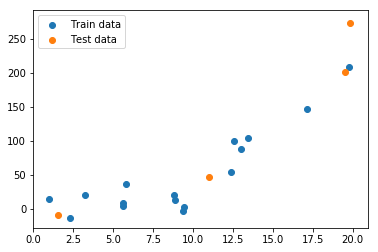

In [44]:
# Lets check what we are doing:
plt.scatter(x_train, y_train, label='Train data')
plt.scatter(x_test, y_test, label='Test data')
plt.legend()
plt.show()

Let's build the model

In [45]:
def y_pred(Phi,beta):
    # beta: vector of coefficients
    # Phi:  Nx(P+1) matrix of features (inputs)
    return Phi.dot(beta)

In [51]:
y_pred(Phi(x_train, 3), beta_MSE(Phi(x_train, 3), y_train))

array([154.30452477,   2.51671031,  22.54103442,   6.25872272,
         2.07412158,  16.73333978,  78.08503086,  29.2076879 ,
        28.67331786,  23.31305567, 209.77818501,  70.79881944,
         2.00197456,   2.05635692,  85.7167365 ,  67.95616016])

For a given model complexity $P$, the training fit is already given by expr.(1) 
evaluated in the training set  (in more complex models, numerical training is needed). The solution for $P=3$ is:

**TODO**: plot results for order 6 polynomial 

beta_hat =  [ 8.86896757e+01 -1.25646175e+02  5.85868776e+01 -1.16455552e+01
  1.10529463e+00 -4.90170979e-02  8.18638232e-04]


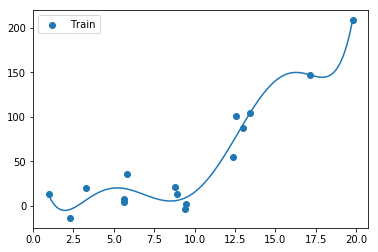

In [56]:
p = 6
beta_hat = beta_MSE(Phi(x_train, p), y_train)
print('beta_hat = ', beta_hat)
plt.scatter(x_train, y_train, label='Train')
x_arr = np.linspace(min(x_train), max(x_train), 100)
plt.plot(x_arr, y_pred(Phi(x_arr, p), beta_hat))
plt.legend()
plt.show()

Now with order 2:

beta_hat =  [15.07795324 -6.24800959  0.82974514]


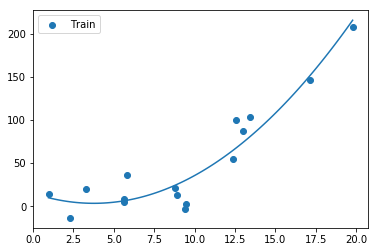

In [57]:
p = 2
beta_hat = beta_MSE(Phi(x_train, p), y_train)
print('beta_hat = ', beta_hat)
plt.scatter(x_train, y_train, label='Train')
x_arr = np.linspace(min(x_train), max(x_train), 100)
plt.plot(x_arr, y_pred(Phi(x_arr, p), beta_hat))
plt.legend()
plt.show()

**TODO**:Let's evaluate the Cost in the training and in the test sets

In [70]:
error_train = []
error_test = []
# Iterate over the degree of the polynomial
for p in range(1,5):
    beta_hat = beta_MSE(Phi(x_train, p), y_train)
    y_pred_train = y_pred(Phi(x_train, p), beta_hat)
    y_pred_test = y_pred(Phi(x_test, p), beta_hat)    
    error_train.append(Cost(y_train, y_pred_train))
    error_test.append(Cost(y_test, y_pred_test))

Lets plot the results:

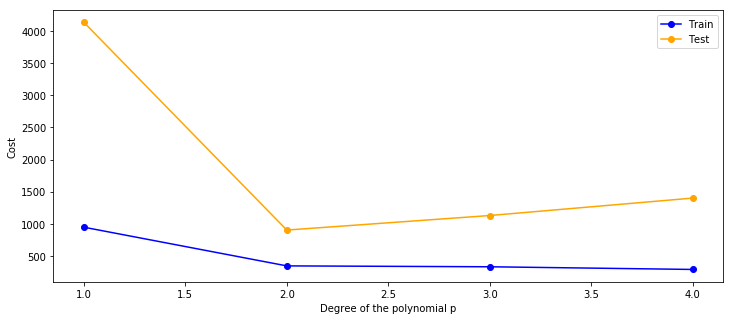

In [71]:
p_arr = np.linspace(1, 4, 4)
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(p_arr, error_train, 'o-', color='blue', label='Train')
ax.plot(p_arr, error_test, 'o-', color='orange', label='Test')
ax.set_xlabel('Degree of the polynomial p')
ax.set_ylabel('Cost')
plt.legend()
plt.show()